In [108]:
import yfinance as yf  
import pandas as pd 
import numpy as np
import mplfinance as mpf
import datetime as dt
from math import exp
import re

import matplotlib.pyplot as plt

In [101]:
simbolo = ["BBVA.MC","BKT.MC","TEF.MC"]
tikers = [yf.Ticker(s) for s in simbolo]
df = [tikers[i].history(period="max").reset_index() for i in range(len(simbolo))]

dateMin = [min(df[i].Date) for i in range(len(simbolo))]
dateMax = [max(df[i].Date) for i in range(len(simbolo))]

for i in range(len(simbolo)):
    df[i] = df[i][(df[i].Date >= dateMin[i]) & (df[i].Date <= dateMax[i])]
    df[i]["symbol"] = [tikers[i].info['symbol']] * len(df[i])

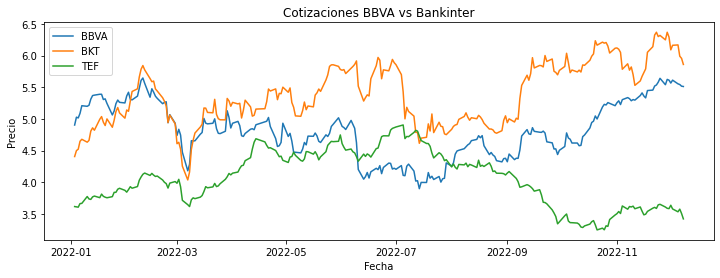

In [102]:
plt.figure(figsize=(12,4))
for i in range(len(simbolo)):
    plt.plot(df[i][df[i].Date > "2022-01-01"]["Date"], df[i][df[i].Date > "2022-01-01"]["Close"], label = min(df[i].symbol).strip('.MC') )
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Cotizaciones BBVA vs Bankinter')
plt.show()

## Matriz varianzas covarianzas

In [200]:
df_init = df[0].groupby('Date').max()
col = "Close"
df_final = df_init.copy()[[col,"symbol"]]
for i in range(1,len(simbolo)):
    df_final = pd.merge(df_final, df[i].groupby('Date').max()[[col,"symbol"]], how ='inner', on='Date')
df_final.reset_index(drop=True, inplace= True)

df_final.columns = [col.strip("_x").strip("_y") + df_final.iloc[0,i+1].strip(".MC") if i%2 == 0 else col.strip("_x").strip("_y") + df_final.iloc[0,i].strip(".MC") for i in range(len(simbolo)*2) ]
df_final = df_final.iloc[:,[i for i in range(len(simbolo)*2) if i%2 == 0  ]].transpose()
m_cov = np.cov(df_final.to_numpy())

In [203]:
df_final

,0,1,2,3,4,5,6,7,8,9,...,5814,5815,5816,5817,5818,5819,5820,5821,5822,5823
CloseBBVA,4.990703,4.860480,4.751374,4.751374,4.811206,4.733777,4.638749,4.623598,4.510048,4.598760,...,5.641,5.540,5.624,5.612,5.566,5.612,5.554,5.543,5.517,5.512
CloseBKT,22.512005,21.488739,21.147642,21.147642,21.051338,21.388084,23.049063,23.663404,26.848869,28.214058,...,6.318,6.248,6.368,6.292,6.090,6.162,6.168,5.990,5.956,5.860
CloseTEF,8.290472,7.948902,7.577490,7.577490,7.590755,7.819571,7.826205,7.643814,8.108079,8.356796,...,3.653,3.610,3.590,3.585,3.638,3.580,3.535,3.577,3.508,3.423


In [199]:
m_cov

array([[ 1.57202352,  1.22067982,  0.80874916],
       [ 1.22067982, 26.40302901,  2.22098794],
       [ 0.80874916,  2.22098794,  2.32024637]])